(Chap_MLE)=
# Maximum Likelihood Estimation

This chapter describes the maximum likelihood estimation (MLE) method. All data and images from this chapter can be found in the data directory ([./data/mle/](https://github.com/OpenSourceEcon/CompMethods/tree/main/data/mle/)) and images directory ([./images/mle/](https://github.com/OpenSourceEcon/CompMethods/tree/main/images/mle/)) for the GitHub repository for this online book.


(SecMLE_GenModel)=
## General characterization of a model and data generating process

Each of the model estimation approaches that we will discuss in this section on Maximum Likelihood estimation (MLE) and in subsequent sections on {ref}`Chap_GMM` (GMM) and {ref}`Chap_SMM` (SMM) involves choosing values of the parameters of a model to make the model match some number of properties of the data. Define a model or a data generating process (DGP) as,

```{math}
    :label: EqMLE_GenMod
    F(x_t, z_t|\theta) = 0
```

where $x_t$ and $z_t$ are variables, $\theta$ is a vector of parameters, and $F()$ is the function expressing the relationship between the variables and parameters.

In richer examples, a model could also include inequalities representing constraints. But this is sufficient for our discussion. The goal of maximum likelihood estimation (MLE) is to choose the parameter vector of the model $\theta$ to maximize the likelihood of seeing the data produced by the model $(x_t, z_t)$.


(SecMLE_GenModel_SimpDist)=
### Simple distribution example

A simple example of a model is a statistical distribution [e.g., the normal distribution $N(\mu, \sigma)$].

```{math}
    :label: EqMLE_GenMod_NormDistPDF
    Pr(x|\theta) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}
```

The probability of drawing value $x_i$ from the distribution $f(x|\theta)$ is $f(x_i|\theta)$. The probability of drawing the following vector of two observations $(x_1,x_2)$ from the distribution $f(x|\theta)$ is $f(x_1|\theta)\times f(x_2|\theta)$. We define the likelihood function of $N$ draws $(x_1,x_2,...x_N)$ from a model or distribution $f(x|\theta)$ as $\mathcal{L}$.

```{math}
    :label: EqMLE_GenMod_NormDistLike
    \mathcal{L}(x_1,x_2,...x_N|\theta) \equiv \prod_{i=1}^N f(x_i|\theta)
```

Because it can be numerically difficult to maximize a product of percentages (one small value can make dominate the entire product), it is almost always easier to use the log likelihood function $\ln(\mathcal{L})$.

```{math}
    :label: EqMLE_GenMod_NormDistLnLike
    \ln\Bigl(\mathcal{L}(x_1,x_2,...x_N|\theta)\Bigr) \equiv \sum_{i=1}^N \ln\Bigl(f(x_i|\theta)\Bigr)
```

The maximum likelihood estimate $\hat{\theta}_{MLE}$ is the following:

```{math}
    :label: EqMLE_GenMod_NormDistMLE
    \hat{\theta}_{MLE} = \theta:\quad \max_\theta \: \ln\mathcal{L} = \sum_{i=1}^N\ln\Bigl(f(x_i|\theta)\Bigr)
```


(SecMLE_GenModel_Econ)=
### Economic example

An example of an economic model that follows the more general definition of $F(x_t, z_t|\theta) = 0$ is {cite}`BrockMirman:1972`. This model has multiple nonlinear dynamic equations, 7 parameters, 1 exogenous time series of variables, and about 5 endogenous time series of variables. Let's look at a simplified piece of that model--the production function--which is commonly used in total factor productivity estimations.

```{math}
    :label: EqMLE_GenMod_EconProdFunc
    Y_t = e^{z_t}(K_t)^\alpha(L_t)^{1-\alpha} \quad\text{where}\quad z_t = \rho z_{t-1} + (1 - \rho)\mu + \varepsilon_t \quad\text{and}\quad \varepsilon_t\sim N(0,\sigma^2)
```

What are the parameters of this model and what are the endogenous variables? If we had data on output $Y_t$, capital $K_t$, and $L_t$, how would we estimate the parameters $\rho$, $\mu$, and $\sigma$? The simplest way I can write this model is $f(Y_t,K_t,L_t|z_0,\rho,\mu,\sigma)=0$.

A maximum likelihood estimation of the parameters $\rho$, $\mu$, and $\sigma$ would either take as data or simulate the total factor productivity series $e^{z_t}$ for all $t$ given the data $Y_t$, $K_t$, and $L_t$, then estimate parameters $\rho$, $\mu$, and $\sigma$ that maximize the likelikhood of those data.

The likelihood of a given data point is determined by $\varepsilon_t = z_t - \rho z_{t-1} - (1 - \rho)\mu \sim N(0,\sigma^2)$. Or in other words the probability of data point $\varepsilon_t$ is $f(z_t - \rho z_{t-1} - (1 - \rho)\mu,\sigma^2$, where $f$ is the normal distribution with mean $z_t - \rho z_{t-1} - (1 - \rho)\mu$ and standard devation $\sigma$.

The likelihood function of all the data is:

```{math}
    :label: EqMLE_GenMod_EconProdFuncLike
    \mathcal{L}\left(z_1,z_2,...z_T|\rho,\mu,\sigma\right) = \prod_{t=2}^T f(z_{t+1},z_t|\rho,\mu,\sigma)
```

The log likelihood function of all the data is:

```{math}
    :label: EqMLE_GenMod_EconProdFuncLnLike
    \ln\Bigl(\mathcal{L}\bigl(z_1,z_2,...z_T|\rho,\mu,\sigma\bigr)\Bigr) = \sum_{t=2}^T \ln\Bigl(f(z_{t+1},z_t|\rho,\mu,\sigma)\Bigr)
```

The maximum likelihood estimate of $\rho$, $\mu$, and $\sigma$ is given by the following maximization problem.

```{math}
    :label: EqMLE_GenMod_EconProdFuncMLE
    (\hat{\rho}_{MLE},\hat{\mu}_{MLE},\hat{\sigma}_{MLE})=(\rho,\mu,\sigma):\quad \max_{\rho,\mu,\sigma}\ln\mathcal{L} = \sum_{t=2}^T \ln\Bigl(f(z_{t+1},z_t|\rho,\mu,\sigma)\Bigr)
```


(SecMLE_DistData)=
## Application: Comparisons of distributions and data

In this section and in the next two chapters on {ref}`Chap_GMM` and {ref}`Chap_SMM`, we will use an application of fitting a truncated normal distribution to test scores data. We first import some data from the total points earned by all the students in two sections of an intermediate macroeconomics class for undergraduates at an unnamed University in a certain year (two semesters). Let's create a histogram of the data.

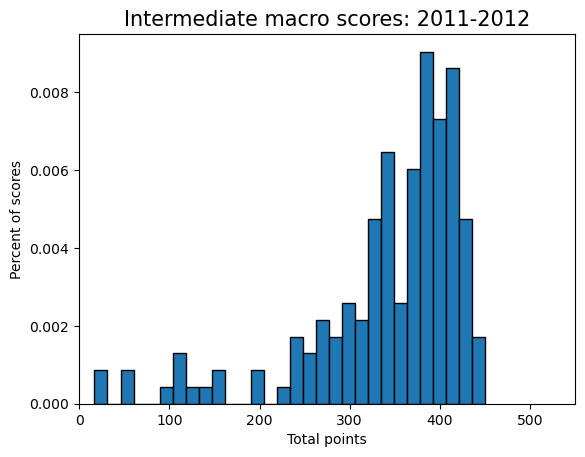

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import requests

# Download and save the data file Econ381totpts.txt as NumPy array
url = ('https://raw.githubusercontent.com/OpenSourceEcon/CompMethods/' +
       'main/data/mle/Econ381totpts.txt')
data_file = requests.get(url, allow_redirects=True)
open('../../../data/mle/Econ381totpts.txt', 'wb').write(data_file.content)
if data_file.status_code == 200:
    # Load the downloaded data into a NumPy array
    data = np.loadtxt('../../../data/mle/Econ381totpts.txt')
else:
    print('Error downloading the file')

# Create a histogram of the data
num_bins = 30
count, bins, ignored = plt.hist(data, num_bins, density=True,
                                edgecolor='k')
plt.title('Intermediate macro scores: 2011-2012', fontsize=15)
plt.xlabel(r'Total points')
plt.ylabel(r'Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

plt.show()

```{figure} ../../../images/mle/Econ381scores_hist.png
---
height: 500px
name: FigMLE_EconScoreHist
---
Histogram of intermediate macroeconomics midterm scores over two semesters: $N=161$
```

Now lets code up a parametric distribution that is flexible enough to fit lots of different distributions of test scores, has the properties we would expect from a distribution of test scores, and is characterized by a minimal number of parameters. In this case, we will use a truncated normal distribution.[^TruncNorm]

In [2]:
import scipy.stats as sts


def trunc_norm_pdf(xvals, mu, sigma, cut_lb=None, cut_ub=None):
    '''
    --------------------------------------------------------------------
    Generate pdf values from the truncated normal pdf with mean mu and
    standard deviation sigma. If the cutoff is given, then the PDF
    values are inflated upward to reflect the zero probability on values
    above the cutoff. If there is no cutoff given, this function does
    the same thing as sp.stats.norm.pdf(x, loc=mu, scale=sigma).
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cut_lb = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar lower bound value of distribution. Values below
             this value have zero probability
    cut_ub = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None

    OBJECTS CREATED WITHIN FUNCTION:
    prob_notcut = scalar
    pdf_vals = (N,) vector, normal PDF values for mu and sigma
               corresponding to xvals data

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    if cut_ub == 'None' and cut_lb == 'None':
        prob_notcut = 1.0
    elif cut_ub == 'None' and cut_lb != 'None':
        prob_notcut = 1.0 - sts.norm.cdf(cut_lb, loc=mu, scale=sigma)
    elif cut_ub != 'None' and cut_lb == 'None':
        prob_notcut = sts.norm.cdf(cut_ub, loc=mu, scale=sigma)
    elif cut_ub != 'None' and cut_lb != 'None':
        prob_notcut = (sts.norm.cdf(cut_ub, loc=mu, scale=sigma) -
                       sts.norm.cdf(cut_lb, loc=mu, scale=sigma))

    pdf_vals    = ((1/(sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (xvals - mu)**2 / (2 * sigma**2))) /
                    prob_notcut)

    return pdf_vals

Let's plot the histogram of the intermediate macroeconomics test scores overlayed by two different truncated nameal distributions, each of which with different arbitrary properties. We want to examine what types of properties make the distribution look more or less like the underlying data.

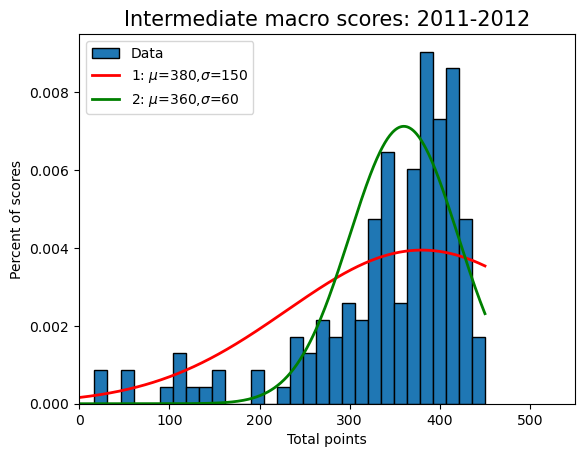

In [3]:
# Plot histogram
num_bins = 30
count, bins, ignored = plt.hist(data, num_bins, density=True,
                                edgecolor='k', label='Data')
plt.title('Intermediate macro scores: 2011-2012', fontsize=15)
plt.xlabel(r'Total points')
plt.ylabel(r'Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

# Plot smooth line with distribution 1
dist_pts = np.linspace(0, 450, 500)
mu_1 = 380
sig_1 = 150
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_1, sig_1, 0, 450),
         linewidth=2, color='r', label='1: $\mu$=380,$\sigma$=150')
plt.legend(loc='upper left')

# Plot smooth line with distribution 2
mu_2 = 360
sig_2 = 60
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_2, sig_2, 0, 450),
         linewidth=2, color='g', label='2: $\mu$=360,$\sigma$=60')
plt.legend(loc='upper left')

plt.show()

```{figure} ../../../images/mle/Econ381scores_2truncs.png
---
height: 500px
name: FigMLE_EconScores2truncs
---
Intermediate macroeconomics midterm scores over two semesters with two arbitrary truncated normal distributions
```

Which distribution will have the biggest log likelihood function? Why?

Let's compute the log likelihood function for this data for both of these distributions.

In [4]:
# Define log likelihood function for the truncated normal distribution
def log_lik_truncnorm(xvals, mu, sigma, cut_lb, cut_ub):
    '''
    --------------------------------------------------------------------
    Compute the log likelihood function for data xvals given truncated
    normal distribution parameters mu, sigma, cut_lb, cut_ub.
    --------------------------------------------------------------------
    INPUTS:
    xvals  = (N,) vector, values of the normally distributed random
             variable
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    cut_lb = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar lower bound value of distribution. Values below
             this value have zero probability
    cut_ub = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        trunc_norm_pdf()

    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals    = (N,) vector, normal PDF values for mu and sigma
                  corresponding to xvals data
    ln_pdf_vals = (N,) vector, natural logarithm of normal PDF values
                  for mu and sigma corresponding to xvals data
    log_lik_val = scalar, value of the log likelihood function

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: log_lik_val
    --------------------------------------------------------------------
    '''
    pdf_vals = trunc_norm_pdf(xvals, mu, sigma, cut_lb, cut_ub)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()

    return log_lik_val

print('Log-likelihood 1: ', log_lik_truncnorm(data, mu_1, sig_1, 0, 450))
print('Log-likelihood 2: ', log_lik_truncnorm(data, mu_2, sig_2, 0, 450))

Log-likelihood 1:  -924.3364498667136
Log-likelihood 2:  -978.3678854857621


Why is the log likelihood value negative? Which distribution is a better fit according to the Log-likelihood value?

How do we estimate $\mu$ and $\sigma$ by maximum likelihood? What values of $\mu$ and $\sigma$ will maximize the likelihood function?

```{math}
    :label: EqMLE_DistData_maxprob
    (\hat{\mu},\hat{\sigma})_{MLE} = (\mu, \sigma):\quad \max_{\mu,\sigma}\:\ln\,\mathcal{L}=\sum_{i=1}^N\ln\Bigl(f(x_i|\mu,\sigma)\Bigr)
```


(SecMLE_DistData_maxprob)=
### How to set up MLE maximization (minimization) problem

A minimizer is a function that chooses a single value or a vector of values to minimize the result of a scalar-valued function of that vector. Any maximization problem can be restated as a minimization problem. Because minimization problems are more numerically stable and well defined, most numerical optimizers are stated as minimizers. The [scipy.optimize](https://docs.scipy.org/doc/scipy/tutorial/optimize.html) library has many types of root-finders and minimizers (see chapter {ref}`Chap_SciPy`). For our maximum likelihood estimation problems, we will use the [scipy.optimize.minimize()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function.


(SecMLE_DistData_crit)=
#### The criterion function

The first step is to write a function that takes two inputs and returns a scalar value.
1. The first input is either a scalar or a vector of values (the object `params` in the function `crit()` below). This object is the value or values being chosen to minimize the criterion function.
2. The second object is Python's variable length input objects `*args`, which is a tuple of variable length positional arguments. As you will see in the `minimize()` function, all the arguments must be passed into the criterion function in one tuple.
3. Lastly, you must make sure that the scalar criterion value that the function returns is the value of the problem stated as a minimization problem and not a maximization problem. In this case of maximum likelihood estimation, you want the negative of the log likelihood function.

In [5]:
def crit(params, *args):
    '''
    --------------------------------------------------------------------
    This function computes the negative of the log likelihood function
    given parameters and data. This is the minimization problem version
    of the maximum likelihood optimization problem
    --------------------------------------------------------------------
    INPUTS:
    params = (2,) vector, ([mu, sigma])
    mu     = scalar, mean of the normally distributed random variable
    sigma  = scalar > 0, standard deviation of the normally distributed
             random variable
    args   = length 2 tuple, (xvals, cutoff)
    xvals  = (N,) vector, values of the normally distributed random
             variable
    cutoff = scalar or string, ='None' if no cutoff is given, otherwise
             is scalar upper bound value of distribution. Values above
             this value have zero probability

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        log_lik_truncnorm()

    OBJECTS CREATED WITHIN FUNCTION:
    log_lik_val = scalar, value of the log likelihood function
    neg_log_lik_val = scalar, negative of log_lik_val

    FILES CREATED BY THIS FUNCTION: None

    RETURNS: neg_log_lik_val
    --------------------------------------------------------------------
    '''
    mu, sigma = params
    xvals, cut_lb, cut_ub = args
    log_lik_val = log_lik_truncnorm(xvals, mu, sigma, cut_lb, cut_ub)
    neg_log_lik_val = -log_lik_val

    return neg_log_lik_val

(SecMLE_DistData_min)=
#### The minimize() function

The `minimize()` function is shorthand for [`scipy.optimize.minimize()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html). This function returns a dictionary of objects including the solution to the optimization problem and whether the problem actually solved. The `minimize` function has three mandatory arguments, plus a lot of options. You can experiment with the options on the [`minimize()` documentation page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html).
1. The first argument of the minimize function is the criterion function (`crit()` in this example) from which the `minimize()` function will test values of the parameters in searching for the minimum value.
2. The second argument is an initial guess for the values of the parameters that minimize the criterion function `crit()`.
3. The third argument is the tuple of all the objects needed to solve the criterion function in `crit()`.

In [6]:
import scipy.optimize as opt

mu_init = 385  # mu_2
sig_init = 120  # sig_2
params_init = np.array([mu_init, sig_init])
mle_args = (data, 0, 450.0)
results_uncstr = opt.minimize(crit, params_init, args=(mle_args))
mu_MLE, sig_MLE = results_uncstr.x
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)

mu_MLE= 622.0568242669326  sig_MLE= 198.72391752520062


In [7]:
print(results_uncstr)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 910.5500677658221
        x: [ 6.221e+02  1.987e+02]
      nit: 26
      jac: [ 0.000e+00 -7.629e-06]
 hess_inv: [[ 6.553e+02  2.913e+02]
            [ 2.913e+02  2.068e+02]]
     nfev: 132
     njev: 44


The `print(results_uncstr)` command above shows the contents of the full output of the `minimize` function. These include whether the numerical minimization was successful (`success: True`), the criterion function value at the optimum (`fun`), the optimal values of the parameters being chosen to minimize the function (`x`), the Jacobian (`jac`, first derivative) of the criterion function with respect to each parameter at the optimum, the inverse Hessian (`hess_inv`, matrix of second derivatives, measure of variance) of the criterian function at the optimum, and measures of how many tries the minimizer used to arrive at the solution (`nit`, `nfev`, `njev`).

Note that we used initial guesses for $\mu$ and $\sigma$ of 385 and 120 and the resulting estimates that minimize the function are surprisingly different from the arbitrarily chose values shown in {numref}`Figure %s <FigMLE_EconScores2truncs>`. The maximum likelihood estimation problem that we set up arrived at MLE estimates of $\mu_{MLE}=622.16$ and $\sigma_{MLE}=198.76$.

{numref}`Figure %s <FigMLE_EconScoresMLE>` below shows the distribution implied by the maximum likelihood estimates of $\mu_{MLE}=622.16$ and $\sigma_{MLE}=198.76$, along with the other two arbitrarily chosen distributions from {numref}`Figure %s <FigMLE_EconScores2truncs>` and how they fit the test score data shown in the histogram.

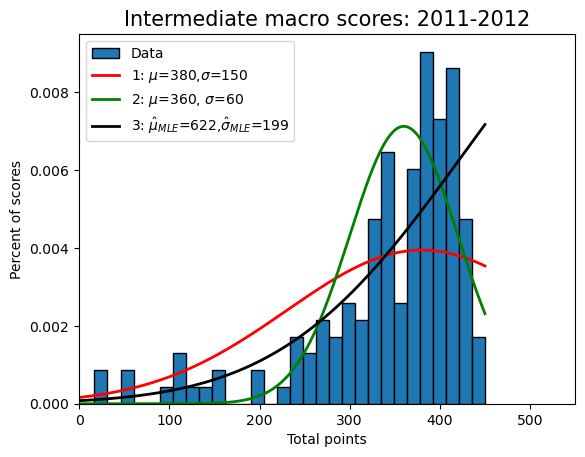

In [8]:
# Plot the histogram of the data
count, bins, ignored = plt.hist(data, num_bins, density=True,
                                edgecolor='k', label='Data')
plt.title('Intermediate macro scores: 2011-2012', fontsize=15)
plt.xlabel(r'Total points')
plt.ylabel(r'Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

# Plot the two test distributions from before
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_1, sig_1, 0, 450),
         linewidth=2, color='r', label='1: $\mu$=380,$\sigma$=150')

plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_2, sig_2, 0, 450),
         linewidth=2, color='g', label='2: $\mu$=360, $\sigma$=60')

# Plot the MLE estimated distribution
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_MLE, sig_MLE, 0, 450),
         linewidth=2, color='k',
         label='3: $\hat{\mu}_{MLE}$=622,$\hat{\sigma}_{MLE}$=199'
)
plt.legend(loc='upper left')

plt.show()

```{figure} ../../../images/mle/Econ381scores_MLE.png
---
height: 500px
name: FigMLE_EconScoresMLE
---
Maximum likelihood estimate of truncated normal distribution to fit intermediate macroeconomics midterm scores over two semesters along with two arbitrary truncated normal distributions
```

Why does the black line MLE estimate fit the data better than the other two parameterizations of the truncated normal distribution? How can we verify this? One way to verify that the MLE estimate is better than the other two estimates is to print the log-likelihood values associated with each distribution. As shown below, the log-likelihood value of the MLE estimate is higher than those of the other two arbitrarily chosen distributions.

In [9]:
lnlik_1 = log_lik_truncnorm(data, mu_1, sig_1, 0, 450)
lnlik_2 = log_lik_truncnorm(data, mu_2, sig_2, 0, 450)
lnlik_MLE = log_lik_truncnorm(data, mu_MLE, sig_MLE, 0, 450)
print('Log-likelihood 1: ', lnlik_1)
print('Log-likelihood 2: ', lnlik_2)
print('MLE log-likelihood 3: ', lnlik_MLE)

Log-likelihood 1:  -924.3364498667136
Log-likelihood 2:  -978.3678854857621
MLE log-likelihood 3:  -910.5500677658221


We can also look at a 3D image of the log-likelihood function in the neighborhood of the MLE estimate to see if that looks like a global maximum.

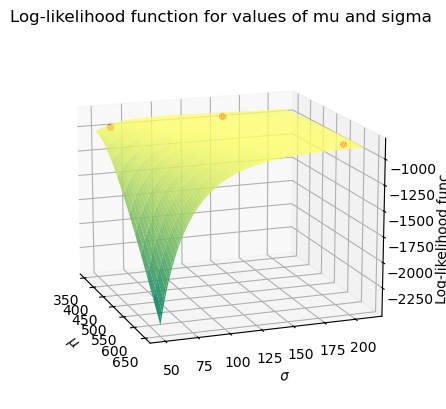

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
cmap1 = matplotlib.colormaps.get_cmap('summer')

mu_vals = np.linspace(350, 650, 90)
sig_vals = np.linspace(50, 210, 100)
lnlik_vals = np.zeros((90, 100))
for mu_ind in range(90):
    for sig_ind in range(100):
        lnlik_vals[mu_ind, sig_ind] = \
            log_lik_truncnorm(data, mu_vals[mu_ind],
                              sig_vals[sig_ind], 0, 450)

mu_mesh, sig_mesh = np.meshgrid(mu_vals, sig_vals)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(mu_mesh.T, sig_mesh.T, lnlik_vals, rstride=8,
                cstride=1, cmap=cmap1, alpha=0.9)
ax.scatter(mu_MLE, sig_MLE, lnlik_MLE, color='red', marker='o',
           s=18, label='MLE estimate')
ax.scatter(mu_1, sig_1, lnlik_1, color='red', marker='o',
           s=18, label="Arbitrary dist'n 1")
ax.scatter(mu_2, sig_2, lnlik_2, color='red', marker='o',
           s=18, label="Arbitrary dist'n 2")
ax.view_init(elev=15, azim=-20, roll=0)
ax.set_title('Log-likelihood function for values of mu and sigma')
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\sigma$')
ax.set_zlabel(r'Log-likelihood func.')

plt.show()

```{figure} ../../../images/mle/Econ381scores_SurfaceLogLike.png
---
height: 500px
name: FigMLE_SurfLogLike
---
Surface of the log-likelihood function for values of $\mu$ and $\sigma$ in the neighborhood of the maximum likelihood estimate. The three scatter points represent the log-likelihood values for the two arbitrary parameterizations of the truncated normal distribution and the maximum likelihood estimate.
```

From the log-likelihood values printed in the output of the code two cells above, we can see that the far-right scatter point in {numref}`Figure %s <FigMLE_SurfLogLike>` is higher than those of the two arbitrary distributions represented by the other two scatter points. But it is hard to eyeball this from {numref}`Figure %s <FigMLE_SurfLogLike>`. It is informative to note that you get similar log likelihood values for many combinations of $\mu$ and $\sigma$ on that flat section of the space.

If we zoom in on the area around the maximum likelihood estimate, we can see that our MLE values of $\hat{\mu}_{MLE}=622$ and $\hat{\sigma}_{MLE}=199$ are in fact optimal.

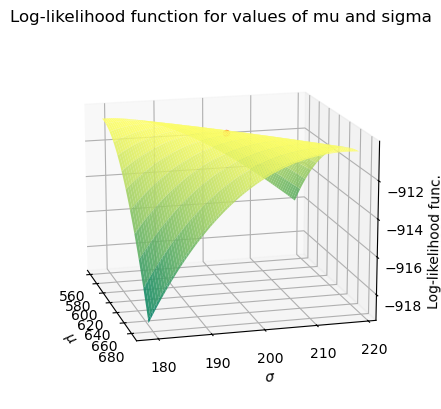

In [11]:
mu_buffer = 0.1
mu_vals = np.linspace(
    mu_MLE - mu_buffer * mu_MLE, mu_MLE + mu_buffer * mu_MLE, 90
)
sig_buffer = 0.1
sig_vals = np.linspace(
    sig_MLE - sig_buffer * sig_MLE, sig_MLE + sig_buffer * sig_MLE, 100
)
lnlik_vals = np.zeros((90, 100))
for mu_ind in range(90):
    for sig_ind in range(100):
        lnlik_vals[mu_ind, sig_ind] = \
            log_lik_truncnorm(data, mu_vals[mu_ind],
                              sig_vals[sig_ind], 0, 450)

mu_mesh, sig_mesh = np.meshgrid(mu_vals, sig_vals)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(mu_mesh.T, sig_mesh.T, lnlik_vals, rstride=8,
                cstride=1, cmap=cmap1, alpha=0.9)
ax.scatter(mu_MLE, sig_MLE, lnlik_MLE, color='red', marker='o',
           s=18, label='MLE estimate')
ax.view_init(elev=15, azim=-15, roll=0)
ax.set_title('Log-likelihood function for values of mu and sigma')
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\sigma$')
ax.set_zlabel(r'Log-likelihood func.')

plt.show()

```{figure} ../../../images/mle/Econ381scores_SurfaceLogLikeZoom.png
---
height: 500px
name: FigMLE_SurfLogLikeZoom
---
Zoomed in surface of the log-likelihood function for values of $\mu$ and $\sigma$ in the neighborhood of the maximum likelihood estimate. The scatter point in the middle of the ridge represents the maximum likelihood estimate.
```

In the zoomed in {numref}`Figure %s <FigMLE_SurfLogLike>`, it looks like there is a ridge cutting diagonally through $(\mu,\sigma)$-space that gives approximately the same log-likelihood. That is, if you decrease both $\mu$ and $\sigma$, you get about the same log-likelihood. How do you interpret this with respect to the underlying test score data and the distributions we are fitting to it?


(SecMLE_DistData_conmin)=
#### Constrained minimization

Because our unconstrained MLE from the previous section gave us an estimate of the truncated normal distribution that was monotonically increasing throughout the range of feasible scores and did not have a decrease in probabilities at the top end of the score distribution ($\mu>450$, see {numref}`Figure %s <FigMLE_EconScoresMLE>`), we might want to run our maximization (minimization) problem with some constraints. For example, we might want to constrain the maximum of the truncated normal distribution $\mu$ to be between 350 and 420, corresponding to the largest mass of the data. And, although we didn't have any problems with this in our unconstrained estimation, we know that the parameter $\sigma$ represents the standard deviation of the underlying normal distribution and, therefore, must be strictly positive.

We can modify our original maximization problem to be a constrained maximization problem.

```{math}
    :label: EqMLE_DistData_conmaxprob
    (\hat{\mu},\hat{\sigma})_{MLE} = (\mu, \sigma):\quad \max_{\mu,\sigma}\:\ln\,\mathcal{L}=\sum_{i=1}^N\ln\Bigl(f(x_i|\mu,\sigma)\Bigr) \\
    \text{s.t.}\quad \mu\in[350,420], \quad \sigma>0
```

The [`minimize()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function has many methods that can be used to find the parameter values that minimize some criterion function. These methods are called using the `method='MethodName'` optional input argument to the minimize function. Three of those methods allow for constrained minimization by providing upper and lower bounds for the parameters being chosen. These three methods are `'L-BFGS-B'`, `'TNC'`, `'SLSQP'`, and `'trust-constr'`.

Let's try the constrained maximum likelihood estimation of the maximization problem in {eq}`EqMLE_DistData_conmaxprob`. This problem constrains $\mu\in[350,420]$ and $\sigma\in(0,\infty)$. You could include these bounds in a constrained minimization by using the following code.

Note that you must set the lower bound of $\sigma$ equal to some small positive number close to zero. You cannot set it to zero itself because the bounds are inclusive. That is, the minimizer might try a value of $\sigma=0$ is the lower bound includes zero.

In [12]:
params_init = np.array([400, 80])
results_cstr = opt.minimize(crit, params_init, args=(mle_args), method='L-BFGS-B',
                            bounds=((350, 420), (1e-10, None)))

In [13]:
print(results_cstr)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 913.1743336878026
        x: [ 4.200e+02  1.290e+02]
      nit: 12
      jac: [-6.000e-02  0.000e+00]
     nfev: 42
     njev: 14
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


In [14]:
mu_MLE_constr, sig_MLE_constr = results_cstr.x
print(
    'Constrained mu_MLE:', mu_MLE_constr,
    ' ,Constrained sig_MLE:', sig_MLE_constr
)

Constrained mu_MLE: 420.0  ,Constrained sig_MLE: 129.04049403351485


In [15]:
print('Inverse Hessian:')
print(results_cstr.hess_inv.todense())

Inverse Hessian:
[[230.45927366  90.3562791 ]
 [ 90.3562791   96.12020176]]


The results are interesting. The minimizer chooses a $\mu$ value that goes right up to the upper bound constraint of $\mu=420$. We can see from the Jacobian that this is not likely a global maximum because the derivative of the likelihood function with respect to $\mu$ is significantly different from 0. We can also see that the log-likelihood function value at the constrained maximum is -913.17 (the negative of the value in `fun`). This is less than the log-likelihood value of the MLE estimate in the unconstrained problem.

The constrained minimizer is trying to get up to the unconstrained solution but is blocked by the constraints we imposed in the `minimize()` function. {numref}`Figure %s <FigMLE_EconScoresMLEconstr>` shows the constrained MLE truncated normal versus the unconstrained MLE truncated normal versus the data.

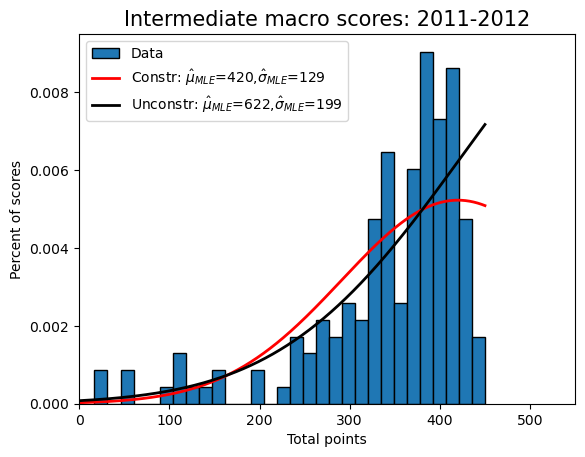

In [16]:
# Plot the histogram of the data
count, bins, ignored = plt.hist(data, num_bins, density=True,
                                edgecolor='k', label='Data')
plt.title('Intermediate macro scores: 2011-2012', fontsize=15)
plt.xlabel(r'Total points')
plt.ylabel(r'Percent of scores')
plt.xlim([0, 550])  # This gives the xmin and xmax to be plotted"

# Plot the constrained MLE estimated distribution
plt.plot(
    dist_pts,
    trunc_norm_pdf(dist_pts, mu_MLE_constr, sig_MLE_constr, 0, 450),
    linewidth=2, color='r',
    label='Constr: $\hat{\mu}_{MLE}$=420,$\hat{\sigma}_{MLE}$=129'
)

# Plot the unconstrained MLE estimated distribution
plt.plot(
    dist_pts,
    trunc_norm_pdf(dist_pts, mu_MLE, sig_MLE, 0, 450),
    linewidth=2, color='k',
    label='Unconstr: $\hat{\mu}_{MLE}$=622,$\hat{\sigma}_{MLE}$=199'
)
plt.legend(loc='upper left')

plt.show()

```{figure} ../../../images/mle/Econ381scores_MLEconstr.png
---
height: 500px
name: FigMLE_EconScoresMLEconstr
---
Constrained maximum likelihood estimate of truncated normal distribution to fit intermediate macroeconomics midterm scores over two semesters along with unconstrained MLE estimate.
```


(SecMLE_VarCov)=
## The variance-covariance matrix of MLE

{cite}`DavidsonMacKinnon:2004`, section 10.4 has a great discussion four different estimators for the variance-covariance matrix of the maximum likelihood estimates. That is, we want to know what is the variance or uncertainty of our estimates for $\mu$ and $\sigma$, and how are those two estimates correlated. The four most common estimators for the VCV matrix of a maximum likelihood estimate are:
1. Empirical Hessian estimator (H)
2. Information matrix estimator (I)
3. Outer-product-of-the-gradient estimator (OPG)
4. Sandwich estimator (S)

All of these estimators of the VCV matrix intuitively measure how flat the likelihood function is at the estimated parameter values in the dimension of each estimated parameter. The Hessian is a matrix of second derivatives of the log-likelihood function with respect to the parameters being chosen. The Hessian matrix therefore captures information about how the slope of the log-likelihood function is changing in each direction. The empirical Hessian estimator is the most commonly used. One really nice property of Python's `minimize()` function is that one of the result objects is the inverse Hessian, which is one of our estimates of the variance-covariance matrix of our estimated parameters.

```{math}
    :label: EqMLE_VarCov_InvH
    \hat{VAR}_H(\hat{\theta}) =-H^{-1}(\hat{\theta})
```

Going back to our unconstrained MLE estimates of $\hat{\mu}_{MLE}=622$ and $\hat{\sigma}_{MLE}=199$ stored in the `results_uncstr` object, our estimate of the variance-covariance matrix of our MLE estimates is the inverse Hessian. Because the diagonal elements of the variance-covariance matrix of the MLE estimates represents the variance of each parameter, the standard errors for each parameter are just the respective square roots of each of the diagonal elements of the matrix.

In [17]:
vcv_mle = results_uncstr.hess_inv

stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('VCV(MLE) = ')
print(vcv_mle)
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)

VCV(MLE) = 
[[655.32159868 291.29484286]
 [291.29484286 206.8165135 ]]
Standard error for mu estimate =  25.599249963134753
Standard error for sigma estimate =  14.381116559729868


(SecMLE_Hypoth)=
## Hypothesis testing

Can we reject the hypothesis that $\mu_1=380$ and $\sigma_1=150$ with 95% confidence? How do you answer that question? What does the figure tell us about this answer? In this section, we will discuss four ways to perform hypothesis testing.
1. Two standard errors (back of the envelope, approximation)
2. Likelihood ratio test
3. Wald test
4. Lagrange multiplier test

{cite}`DavidsonMacKinnon:2004`, section 10.5 has a more detailed discussion of methods 2, 3, and 4.


(SecMLE_Hypoth_2se)=
### Back of the envelope, two standard errors (assuming normality)

A really quick approach to hypothesis testing is to see if your hypothesized values are within two standard errors of the estimated values. This approach is not completely correct because estimates in the log likelihood function are not symmetrically distributed. But it is at least a first approximation.

In [18]:
lb_mu_95pctci = mu_MLE - 2 * stderr_mu_mle
print('mu_1=', mu_1, ', lower bound 95% conf. int.=', lb_mu_95pctci)

lb_sig_95pctci = sig_MLE - 2 * stderr_sig_mle
print('sig_1=', sig_1, ', lower bound 95% conf. int.=', lb_sig_95pctci)

mu_1= 380 , lower bound 95% conf. int.= 570.8583243406631
sig_1= 150 , lower bound 95% conf. int.= 169.96168440574087


(SecMLE_Hypoth_LR)=
### Likelihood ratio test

The likelihood ratio test is a joint test of all the parameters. It is the simplest and, therefore, the most common of the three more precise methods (2, 3, and 4). Let your maximum likelihood estimation have $p$ parameters (the vector $\theta$ has $p$ elements), let $\hat{\theta}_{MLE}$ be the maximum likelihood estimate, and let $\tilde{\theta}$ be your hypothesized values of the parameters. The likelihood ratio test statistic is the following.

```{math}
    :label: EqMLE_Hypoth_LR
    LR(\tilde{\theta}|\hat{\theta}_{MLE}) = 2\Bigl(\ln\ell(\hat{\theta}_{MLE}) - \ln\ell(\tilde{\theta})\Bigr) \sim \chi^2(p)
```

Note that this is a joint test of the likelihood of $H_0: \mu_0, \sigma_0$. The value of the $\chi^2(p)$ has the following interpretation. The area under the $\chi^2(p)$ pdf from $LR$ and above is the significance level or $p$-value. It represents the probability that the null hypothesis $\tilde{\theta}$ is true given the MLE estimate $\hat{\theta}_{MLE}$. More precisely, it represents the probability of null hypotheses with LR test statistics greater than or equal to (worse) the LR statistic from the null hypothese $\tilde{\theta}$. When this $p$-value is small, it it highly unlikely that the null hypothesis is true. You can calculate the $\chi^2(p)$ significance level by taking one minus the cdf of $\chi^2(p)$ at the $LR$ value.

Let's test the likelihood that the constrained MLE parameters from the previous section ($\hat{\mu}_{cstr}=420$, $\hat{\sigma}_{cstr}=129$) are from the true distribution given that the unconstrained MLE parameters ($\hat{\mu}_{uncstr}=622$, $\hat{\sigma}_{cstr}=199$) represent the truth.

In [19]:
print('Constrained mu_MLE:', mu_MLE_constr,
      ', Constrained sigma_MLE:', sig_MLE_constr)
log_lik_h0 = log_lik_truncnorm(data, mu_MLE_constr, sig_MLE_constr, 0, 450)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_lik_truncnorm(data, mu_MLE, sig_MLE, 0, 450)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

Constrained mu_MLE: 420.0 , Constrained sigma_MLE: 129.04049403351485
hypothesis value log likelihood -913.1743336878026
MLE log likelihood -910.5500677658221
likelihood ratio value 5.248531843961018
chi squared of H0 with 2 degrees of freedom p-value =  0.07249295299022973


That $p$-value of 0.072 actually represents a higher significance than the back-of-the-envelope method from the previous section would suggest. This is because the constrained solution lies along that ridge of high log-likelihood shown in {numref}`Figure %s <FigMLE_SurfLogLikeZoom>`.


(SecMLE_LinReg)=
## Linear regression with MLE

Although linear regression is most often performed using the ordinary least squares (OLS) estimator (see the {ref}`SecBasicEmpLinReg` section of the {ref}`Chap_BasicEmpirMethods` chapter), which is a particular type of generalized method of moments (GMM) estimator (see {ref}`Chap_GMM` chapter), these parameters can also be estimated using maximum likelihood estimation (MLE). A simple regression specification in which the dependent variable $y_i$ is a linear function of two independent variables $x_{1,i}$ and $x_{2,i}$ is the following:

```{math}
    :label: EqMLE_LinReg_eqn
    y_i = \beta_0 + \beta_1 x_{1,i} + \beta_2 x_{2,i} + \varepsilon_i \quad\text{where}\quad \varepsilon_i\sim N\left(0,\sigma^2\right)
```

If we solve this regression equation for the error term $\varepsilon_i$, we can start to see how we might estimate the parameters of the model by maximum likelihood.

```{math}
    :label: EqMLE_LinReg_eps
    \varepsilon_i = y_i - \beta_0 - \beta_1 x_{1,i} - \beta_2 x_{2,i} \sim N\left(0,\sigma^2\right)
```

The parameters of the regression model are $(\beta_0, \beta_1, \beta_2, \sigma)$. Given some data $(y_i, x_{1,i}, x_{2,i})$ and given some parameter values $(\beta_0, \beta_1, \beta_2, \sigma)$, we could plot a histogram of the distribution of those error terms. And we could compare that empirical histogram to the assumed histogram of the distribution of the errors $N(0,\sigma^2)$. ML estimation of this regression equation is to choose the paramters $(\beta_0, \beta_1, \beta_2, \sigma)$ to make that empirical distribution of errors $\varepsilon_i$ most closely match the assumed distribution of errors $N(0,\sigma^2)$.

Note that estimating a linear regression model using MLE has the flexible property of being able to accomodate any distribution of the error terms, and not just normally distributed errors.


(SecMLE_GBfam)=
## Generalized beta family of distributions

For {numref}`ExercStructEst_MLE_claims`, you will need to know the functional forms of four continuous univariate probability density functions (PDF's), each of which are part of the generalized beta family of distributions. {numref}`Figure %s <FigMLE_GBtree>` below is the generalized beta family of distributions, taken from Figure 2 of {cite}`McDonaldXu:1995`.

```{figure} ../../../images/mle/GBtree.png
---
height: 500px
name: FigMLE_GBtree
---
Generalized beta family of distributions, taken from Fig. 2 of {cite}`McDonaldXu:1995`
```

(SecMLE_GBfam_LN)=
### Lognormal distribution (LN, 2 parameters)

The lognormal distribution (LN) is the distribution of the exponential of a normally distributed variable with mean $\mu$ and standard deviation $\sigma$. If the variable $x_i$ is lognormally distributed $x_i\sim LN(\mu,\sigma)$, then the log of $x_i$ is normally distributed $\ln(x_i)\sim N(\mu,\sigma)$. The PDF of the lognormal distribution is the following.

```{math}
    :label: EqMLE_GBfam_LN
    \text{(LN):}\quad f(x;\mu,\sigma) = \frac{1}{x\sigma\sqrt{2\pi}}e^{-\frac{[\ln(x)-\mu]^2}{2\sigma^2}},\quad x\in(0,\infty), \:\mu\in(-\infty,\infty),\: \sigma>0
```

Note that the lognormal distribution has a support that is strictly positive. This is one reason why it is commonly used to approximate income distributions. A household's total income is rarely negative. The lognormal distribution also has a lot of the nice properties of the normal distribution.

(SecMLE_GBfam_GA)=
### Gamma distribution (GA, 2 parameters)

Another two-parameter distribution with strictly positive support is the gamma (GA) distribution. The pdf of the gamma distribution is the following.

```{math}
    :label: EqMLE_GBfam_GA
    \text{(GA):}\quad f(x;\alpha,\beta) = \frac{1}{\beta^\alpha \Gamma(\alpha)}x^{\alpha-1}e^{-\frac{x}{\beta}},\quad x\in[0,\infty), \:\alpha,\beta>0 \\
    \text{where}\quad \Gamma(z)\equiv\int_0^\infty t^{z-1}e^{-t}dt
```

The gamma function $\Gamma(\cdot)$ within the gamma (GA) distribution is a common mathematical function that has a preprogrammed function in most programming languages.

(SecMLE_GBfam_GG)=
### Generalized Gamma distribution (GG, 3 parameters)

The lognormal (LN) and gamma (GA) distributions are both two-parameter distributions and are both special cases of the three-parameter generalized gamma (GG) distribution. The pdf of the generalized gamma distribution is the following.

```{math}
    :label: EqMLE_GBfam_GG
    \text{(GG):}\quad f(x;\alpha,\beta,m) = \frac{m}{\beta^\alpha \Gamma\left(\frac{\alpha}{m}\right)}x^{\alpha-1}e^{-\left(\frac{x}{\beta}\right)^m},\quad x\in[0,\infty), \:\alpha,\beta,m>0 \\
    \text{where}\quad \Gamma(z)\equiv\int_0^\infty t^{z-1}e^{-t}dt
```

The relationship between the generalized gamma (GG) distribution and the gamma (GA) distribution is straightforward. The GA distribution equals the GG distribution at $m=1$.

```{math}
    :label: EqMLE_GBfam_GAtoGG
    GA(\alpha,\beta) = GG(\alpha,\beta,m=1)
```

The relationship between the generalized gamma (GG) distribution and the lognormal (LN) distribution is less straightforward. The LN distribution equals the GG distribution as $\alpha$ goes to zero, $\beta = (\alpha\sigma)^{\frac{2}{\alpha}}$, and $m = \frac{\alpha\mu+1}{\alpha^2\sigma^2}$. See {cite}`McDonaldEtAl:2013` for derivation.

```{math}
    :label: EqMLE_GBfam_LNtoGG
    LN(\mu,\sigma) = \lim_{\alpha\rightarrow 0}GG\left(\alpha,\beta=(\alpha\sigma)^{\frac{2}{\alpha}},m=\frac{\alpha\mu+1}{\alpha^2\sigma^2}\right)
```


(SecMLE_GBfam_GB2)=
### Generalized beta 2 distribution (GB2, 4 parameters)

The last distribution we describe is the generalized beta 2 (GB2) distribution. Like the GG, GA, and LN distributions, it also has a strictly positive support. The PDF of the generalized beta 2 distribution is the following.

```{math}
    :label: EqMLE_GBfam_GB2
    \text{(GB2):}\quad f(x;a,b,p,q) = \frac{a x^{ap-1}}{b^{ap}B(p,q)\left(1 + \left(\frac{x}{b}\right)^a\right)^{p+q}},\quad x\in[0,\infty), \:a,b,p,q>0 \\
    \quad\text{where}\quad B(v,w)\equiv\int_0^1 t^{v-1}(1-t)^{w-1}dt
```

The beta function $B(\cdot,\cdot)$ within the GB2 distribution is a common function that has a preprogrammed function in most programming languages. The three-parameter generalized gamma (GG) distribution is a nested case of the four-parameter generalized beta 2 (GB2) distribution as $q$ goes to $\infty$ and for $a=m$, $b=q^{1/m}\beta$, and $p=\frac{\alpha}{m}$. See {cite}`McDonald:1984`, p. 662 for a derivation.

```{math}
    :label: EqMLE_GBfam_GGtoGB2
    GG(\alpha,\beta,m) = \lim_{q\rightarrow\infty}GB2\left(a=m,b=q^{1/m}\beta,p=\frac{\alpha}{m},q\right)
```

The statistical family tree figure above shows the all the relationships between the various PDF's in the generalized beta family of distributions.


(SecMLE_Exerc)=
## Exercises

```{exercise-start} Health claim amounts and the GB family of distributions
:label: ExercStructEst_MLE_claims
:class: green
```
For this problem, you will use 10,619 health claims amounts from a fictitious sample of households. These data are in a single column of the text file [`claims.txt`](https://github.com/OpenSourceEcon/CompMethods/blob/main/data/mle/claims.txt) in the online book repository data folder `data/mle/`. This file is a comma separated text file with no labels. Health claim amounts are reported in US dollars. For this exercise, you will need to use the generalized beta family of distributions shown in {numref}`Figure %s <FigMLE_GBtree>` of Section {ref}`SecMLE_GBfam`. You may want to use the [`distributions.py`](https://github.com/OpenSourceEcon/CompMethods/blob/main/code/mle/distributions.py) module in the [`./code/mle/`](https://github.com/OpenSourceEcon/CompMethods/blob/main/code/mle/) folder of the GitHub repository for this online book.

1. Calculate and report the mean, median, maximum, minimum, and standard deviation of monthly health expenditures for these data. Plot two histograms of the data in which the $y$-axis gives the percent of observations in the particular bin of health expenditures and the $x$-axis gives the value of monthly health expenditures. Use percentage histograms in which the height of each bar is the percent of observations in that bin. In the first histogram, use 1,000 bins to plot the frequency of all the data. In the second histogram, use 100 bins to plot the frequency of only monthly health expenditures less-than-or-equal-to \$800 ($x_i\leq 800$). Adjust the frequencies of this second histogram to account for the observations that you have not displayed ($x_i>800$). That is, the heights of the histogram bars in the second histogram should not sum to 1 because you are only displaying a fraction of the data. Comparing the two histograms, why might you prefer the second one?
2. Using MLE, fit the gamma $GA(x|\alpha,\beta)$ distribution to the individual observation data. Use $\beta_0=Var(x)/E(x)$ and $\alpha_0=E(x)/\beta_0$ as your initial guess. These initial guesses come from the property of the gamma (GA) distribution that $E(x)=\alpha\beta$ and $Var(x)=\alpha\beta^2$. Report your estimated values for $\hat{\alpha}$ and $\hat{\beta}$, as well as the value of the maximized log likelihood function $\ln\mathcal{L}(\hat{\theta})$. Plot the second histogram from part (1) overlayed with a line representing the implied histogram from your estimated gamma (GA) distribution.
3. Using MLE, fit the generalized gamma $GG(x|\alpha,\beta,m)$ distribution to the individual observation data. Use your estimates for $\alpha$ and $\beta$ from part(2), as well as $m=1$, as your initial guess. Report your estimated values for $\hat{\alpha}$, $\hat{\beta}$, and $\hat{m}$, as well as the value of the maximized log likelihood function $\ln\mathcal{L}$. Plot the second histogram from part (1) overlayed with a line representing the implied histogram from your estimated generalized gamma (GG) distribution.
4. Using MLE, fit the generalized beta 2 $GB2(x|a,b,p,q)$ distribution to the individual observation data. Use your estimates for $\alpha$, $\beta$, and $m$ from part (3), as well as $q=10,000$, as your initial guess. Report your estimated values for $\hat{a}$, $\hat{b}$, $\hat{p}$, and $\hat{q}$, as well as the value of the maximized log likelihood function $\ln\mathcal{L}$. Plot the second histogram from part(1) overlayed with a line representing the implied histogram from your estimated generalized beta 2 (GB2) distribution.
5. Perform a likelihood ratio test for each of the estimated distributions in parts (2) and (3), respectively, against the GB2 specification in part (4). This is feasible because each distribution is a nested version of the GB2. The degrees of freedom in the $\chi^2(p)$ is 4, consistent with the GB2. Report the $\chi^2(4)$ values from the likelihood ratio test for the estimated GA and the estimated GG distributions.
6. Using the estimated GB2 distribution from part (4), how likely am I to have a monthly health care claim of more than \$1,000 in a given month? How does this amount change if I use the estimated GA distribution from part (2)?
```{exercise-end}
```

```{exercise-start} MLE estimation of simple macroeconomic model
:label: ExercStructEst_MLE_BM72
:class: green
```
You can observe time series data in an economy for the following variables: $(c_t, k_t, w_t, r_t)$. Data on $(c_t, k_t, w_t, r_t)$ can be loaded from the file [`MacroSeries.txt`](https://github.com/OpenSourceEcon/CompMethods/blob/main/data/mle/MacroSeries.txt) in the online book repository data folder `data/mle/`. This file is a comma separated text file with no labels. The variables are ordered as $(c_t, k_t, w_t, r_t)$. These data have 100 periods, which are quarterly (25 years). Suppose you think that the data are generated by a process similar to the {cite}`BrockMirman:1972` paper. A simplified set of characterizing equations of the Brock and Mirman model are the following six equations.
```{math}
    :label: EqMLE_BM72_eul
    (c_t)^{-1} - \beta E\left[r_{t+1}(c_{t+1})^{-1}\right] = 0
```
```{math}
    :label: EqMLE_BM72_bc
    c_t + k_{t+1} - w_t - r_t k_t = 0
```
```{math}
    :label: EqMLE_BM72_focl
    w_t - (1-\alpha)e^{z_t}(k_t)^\alpha = 0
```
```{math}
    :label: EqMLE_BM72_fock
    r_t - \alpha e^{z_t}(k_t)^{\alpha-1} = 0
```
```{math}
    :label: EqMLE_BM72_zt
    z_t = \rho z_{t-1} + (1-\rho)\mu + \varepsilon_t \quad\text{where}\quad \varepsilon_t\sim N(0,\sigma^2)
```
```{math}
    :label: EqMLE_BM72_prod
    y_t = e^{z_t}(k_t)^\alpha
```
The variable $c_t$ is aggregate consumption in period $t$, $k_{t+1}$ is total household savings and investment in period $t$ for which they receive a return in the next period (this model assumes full depreciation of capital). The wage per unit of labor in period $t$ is $w_t$ and the interest rate or rate of return on investment is $r_t$. Total factor productivity is $z_t$, which follows an AR(1) process given in {eq}`EqMLE_BM72_zt`. The rest of the symbols in the equations are parameters that must be estimated $(\alpha,\beta,\rho,\mu,\sigma)$. The constraints on these parameters are the following.
\begin{equation*}
  \alpha,\beta \in (0,1),\quad \mu,\sigma > 0, \quad\rho\in(-1,1)
\end{equation*}
Assume that the first observation in the data file variables is $t=1$. Let $k_1$ be the first observation in the data file for the variable $k_t$. Assume that $z_0 = \mu$ so that $z_1= \mu$. Assume that the discount factor is known to be $\beta=0.99$.
1. Use the data $(w_t, k_t)$ and equations {eq}`EqMLE_BM72_focl` and {eq}`EqMLE_BM72_zt` to estimate the four parameters $(\alpha,\rho,\mu,\sigma)$ by maximum likelihood. Given a guess for the parameters $(\alpha,\rho,\mu,\sigma)$, you can use the two variables from the data $(w_t, k_t)$ and {eq}`EqMLE_BM72_focl` to back out a series for $z_t$. You can then use equation {eq}`EqMLE_BM72_zt` to compute the probability of each $z_t\sim N\Bigl(\rho z_{t-1} + (1-\rho)\mu,\sigma^2\Bigr)$. The maximum likelihood estimate $(\hat{\alpha},\hat{\rho},\hat{\mu},\hat{\sigma})$ maximizes the likelihood function of that normal distribution of $z_t$'s. Report your estimates and the inverse hessian variance-covariance matrix of your estimates.
2. Now we will estimate the parameters another way. Use the data $(r_t, k_t)$ and equations {eq}`EqMLE_BM72_fock` and {eq}`EqMLE_BM72_zt` to estimate the four parameters $(\alpha,\rho,\mu,\sigma)$ by maximum likelihood. Given a guess for the parameters $(\alpha,\rho,\mu,\sigma)$, you can use the two variables from the data $(r_t, k_t)$ and {eq}`EqMLE_BM72_fock` to back out a series for $z_t$. You can then use equation {eq}`EqMLE_BM72_zt` to compute the probability of each $z_t\sim N\Bigl(\rho z_{t-1} + (1-\rho)\mu,\sigma^2\Bigr)$. The maximum likelihood estimate $(\hat{\alpha},\hat{\rho},\hat{\mu},\hat{\sigma})$ maximizes the likelihood function of that normal distribution of $z_t$'s. Report your estimates and the inverse hessian variance-covariance matrix of your estimates.
3. According to your estimates from part (1), if investment/savings in the current period is $k_t=7,500,000$ and the productivity shock in the previous period was $z_{t-1} = 10$, what is the probability that the interest rate this period will be greater than $r_t=1$. That is, solve for $Pr(r_t>1|\hat{\theta},k_t,z_{t-1})$. [HINT: Use equation {eq}`EqMLE_BM72_fock` to solve for the $z_t=z^*$ such that $r_t = 1$. Then use {eq}`EqMLE_BM72_zt` to solve for the probability that $z_t > z^*$.]
```{exercise-end}
```


(SecMLEfootnotes)=
## Footnotes

The footnotes from this chapter.

[^TruncNorm]: See Section {ref}`SecAppendixTruncNormal` of the Appendix for a description of the truncated normal distribution.